In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [2]:
dataset_path = './dataset/1'
dataset_version = '1.2.11'
limit_image = 5

In [3]:
headers = ['Track ID', 'xmin', 'ymin', 'xmax', 'ymax', 'frame', 'lost', 'occluded', 'generated', 'label', ' actions']

In [4]:
colors = np.array([[1.0, 0.0, 0.0], [0.0, 0.0, 1.0]])
resolution = (640, 360)

four_cc = cv2.VideoWriter_fourcc(*'mp4v')
video_out = cv2.VideoWriter('output2.mp4', four_cc, 29.9, resolution)

def write_boxes(path_video, path_label):
    labels_df = pd.read_csv(path_label, delimiter=' ', names=headers)
    counter = 0 

    video_cap = cv2.VideoCapture(path_video)

    while True:
        success, image = video_cap.read()
        
        if not success:
            break
        image = cv2.resize(image, resolution)
        frame_boxes = labels_df.loc[labels_df.frame == counter]
        
        for _, box in frame_boxes.iterrows():
            x_min = math.trunc(int(box.xmin)/6)
            y_min = math.trunc(int(box.ymin)/6)
            x_max = math.trunc(int(box.xmax)/6)
            y_max = math.trunc(int(box.ymax)/6)
            image = cv2.rectangle(image, (x_min, y_min), (x_max, y_max), [255,0,0], 1)
        
        video_out.write(image)        
        counter += 1
            

In [5]:
videos = [['flat_data/videos/1.2.6.mp4', 'flat_data/labels/1.2.6.txt'],
          ['flat_data/videos/1.2.7.mp4', 'flat_data/labels/1.2.7.txt'],
          ['flat_data/videos/2.1.10.mp4', 'flat_data/labels/2.1.10.txt'],
          ['flat_data/videos/2.2.6.mp4', 'flat_data/labels/2.2.6.txt'],
          ['flat_data/videos/2.2.8.mp4', 'flat_data/labels/2.2.8.txt'],]

for v in videos:
    write_boxes(v[0], v[1])
    
video_out.release()

## Video extraction

In [6]:
counter = 0
video_cap = cv2.VideoCapture('flat_data/videos/2.1.4.mp4')
resolution = (640, 360)

while True:
    success, image = video_cap.read()
    
    if not success:
        break
    image = cv2.resize(image, resolution)
    cv2.imwrite(f'darkflow/dataset/frames-2.1.4/{counter}.jpg', image)
    counter += 1

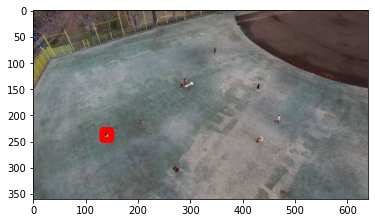

In [6]:
image = cv2.imread('darkflow/dataset-2.2.9/frames/1.jpg')
image = cv2.rectangle(image, (132, 228), (149, 247), [255,0,0], 10)
plt.imshow(image)
plt.show()